In [1]:
import os
import time
from collections import defaultdict
from pathlib import Path
from openai import OpenAI
import matplotlib.pyplot as plt
from mutagen.mp3 import MP3

client = OpenAI(api_key=os.getenv("OPENAI_KEY"))

input_text = """
My, občané České republiky v Čechách, na Moravě a ve Slezsku,
v čase obnovy samostatného českého státu,
věrni všem dobrým tradicím dávné státnosti zemí Koruny české i státnosti československé,
odhodláni budovat, chránit a rozvíjet Českou republiku
v duchu nedotknutelných hodnot lidské důstojnosti a svobody
"""


def get_mp3_length(file_path):
    audio = MP3(file_path)
    return audio.info.length

num_runs = 3
sleep_between_s = 60

models = ["tts-1-hd", "tts-1"]

voices = ["alloy"]
voices = ["alloy", "echo", "fable", "onyx", "nova", "shimmer"]

time_measurements = defaultdict(list)
audio_length = defaultdict(list)

for i in range(0, num_runs):
    for model in models:
        for voice in voices:

                test_name = f"{model}_{voice}"

                speech_file_path = Path("./") / "output" / f"{test_name}.mp3"
                start_time = time.time()
                response = client.audio.speech.create(
                  model=model,
                  voice=voice,
                  input=input_text
                )
                end_time = time.time()
                download_time = end_time - start_time

                time_measurements[test_name].append(download_time)

                response.write_to_file(speech_file_path)

                audio_time = get_mp3_length(speech_file_path)
                audio_length[test_name].append(audio_time)

    time.sleep(sleep_between_s)

print(time_measurements)
print(audio_length)

defaultdict(<class 'list'>, {'tts-1-hd_alloy': [5.817022085189819, 5.340800046920776, 5.178795099258423, 4.982203006744385, 6.253762245178223, 5.450951814651489, 5.356669902801514, 5.061752080917358, 5.097590684890747, 5.535071134567261, 5.585904836654663, 5.189362049102783, 4.7704198360443115, 5.313316106796265, 4.100847959518433], 'tts-1-hd_echo': [5.184547662734985, 4.208859205245972, 5.106193780899048, 5.6310648918151855, 4.378990173339844, 5.115384101867676, 5.208928108215332, 4.801745891571045, 3.99912691116333, 5.220968008041382, 4.840876817703247, 5.243429899215698, 5.37792706489563, 4.616461753845215, 4.907714605331421], 'tts-1-hd_fable': [5.481462001800537, 5.33673620223999, 5.4457688331604, 5.334228038787842, 5.286762952804565, 5.325106143951416, 5.342078924179077, 5.152555227279663, 4.665689706802368, 5.390625, 5.535717010498047, 5.987184047698975, 5.4245970249176025, 5.057360887527466, 5.042999982833862], 'tts-1-hd_onyx': [25.146084785461426, 25.261826038360596, 25.1327869

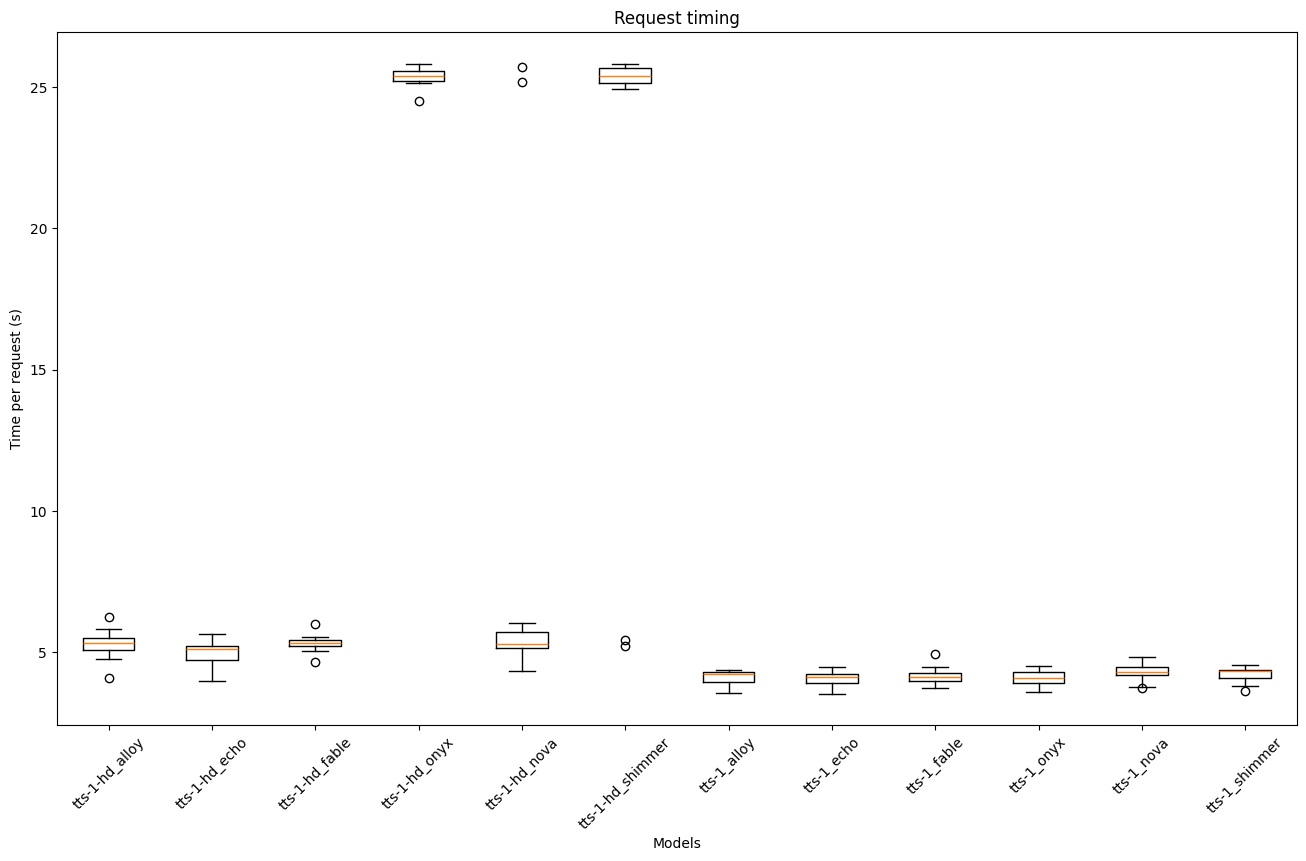

In [2]:
plt.figure(figsize=(16, 9))
plt.boxplot(list(time_measurements.values()), labels=list(time_measurements.keys()))

plt.xlabel('Models')
plt.ylabel('Time per request (s)')
plt.xticks(rotation=45)

plt.title('Request timing')
plt.savefig("timing.png")

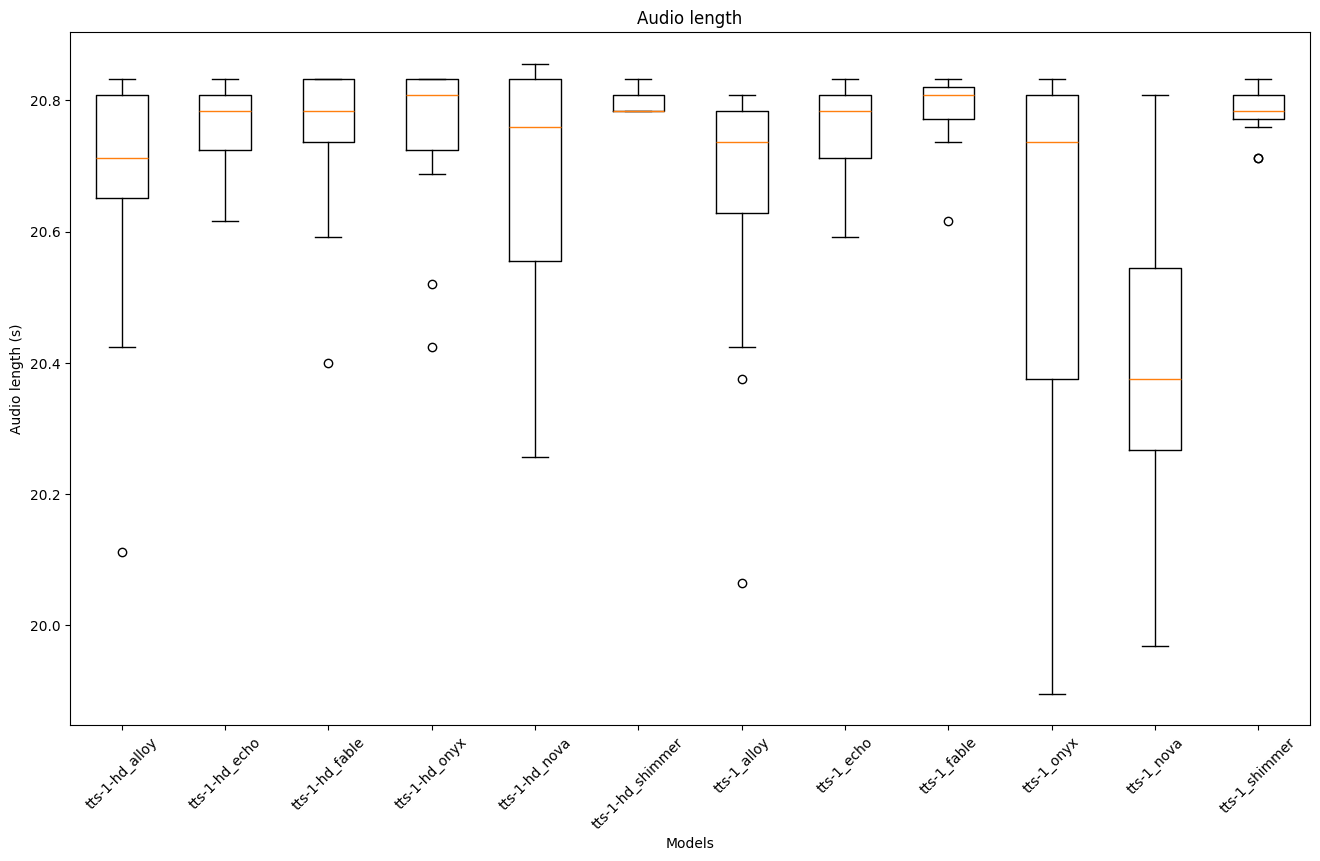

In [3]:
plt.figure(figsize=(16, 9))
plt.boxplot(list(audio_length.values()), labels=list(audio_length.keys()))

plt.xlabel('Models')
plt.ylabel('Audio length (s)')
plt.xticks(rotation=45)

plt.title('Audio length')
plt.savefig("length.png")